In [1]:
# importing Some basic require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv('train.csv')

In [3]:
# Showing top 5 rows of our dataset.
df=df.head(12000)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
4793,4793,9464,9465,What is the best iphone keyboard?,iOS 8: What is the best (third-party) keyboard...,0
7649,7649,14936,14937,What will be the impact on Indian people if th...,What are the benefits of GST bill for common p...,1
8105,8105,15808,15809,Where should I travel in Australia if I have t...,What is your review of Visiting and Travel in ...,0
3965,3965,7853,7854,What are contact details of Michael Stevens of...,From where and how does Michael Stevens of the...,0
2039,2039,4057,4058,Is there an option for personal chat on Quora?,Is there no option to chat with a person on Qu...,1
4820,4820,9515,9516,What is the definition of notorious service?,Who was the most notorious sniper in all of hi...,0
7471,7471,14595,14596,What is there if you didn't clear TCS Lapp exam.?,What if I didn't able to clear TCS Lapp exam?,1
7572,7572,14786,14787,What are some of the most successful social m...,What was your most successful social media cam...,0
215,215,431,432,Is the neutron star made up of?,Is the neutron star made up of only neutrons?,1
7992,7992,15597,15598,Why is Raghu Ram so stupid?,Who is the wife of Raghu Ram from Roadies?,0


In [5]:

# shape of our dataset
print('The shape of our dataset is: ',df.shape)

The shape of our dataset is:  (12000, 6)


In [6]:
# checking null values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

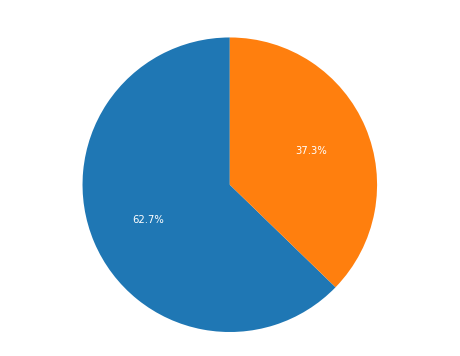

In [7]:
# the proportion of duplicate and non-duplicate question pairs.
# Count the occurrences of each class
duplicate_counts = df['is_duplicate'].value_counts()

# Visualize the distribution using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(duplicate_counts, labels=['Non-Duplicate', 'Duplicate'], autopct='%1.1f%%', startangle=90,textprops={'color': 'white'})
plt.title('Distribution of Duplicate and Non-Duplicate Question Pairs',color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [8]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [9]:
# apply these preprocessing into our dataset -- columns ('question1','question2')
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [10]:
# after applying preprocess step the dataset looks like
df[['question1','question2']]

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water
...,...,...
11995,i am financially stuck in a half baked relatio...,careers i am stuck in a telecom company from ...
11996,what are the best fruits to eat for weight loss,what fruits should i eat for losing weight
11997,how will banning rs 500 and rs 1k notes help...,how banning 500 and 1k rupees note will curb t...
11998,which is the best college for biotechnology in...,what are the best colleges for biotechnology i...


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize NLTK's English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from text
def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)  # Join the filtered tokens back into a sentence

# Apply stopwords removal to the 'question1' column
df['question1'] = df['question1'].apply(remove_stopwords)

# Apply stopwords removal to the 'question2' column
df['question2'] = df['question2'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# applying lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')

# nltk.download('punkt')
# nltk.download('stopwords')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize text
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each word
    return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a sentence

# Apply lemmatization to the 'question1' column
df['question1'] = df['question1'].apply(lemmatize_text)

# Apply lemmatization to the 'question2' column
df['question2'] = df['question2'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# implement TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Merge texts
questions = list(df['question1']) + list(df['question2'])

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000) # taking 4000 features only

# Transform the merged texts into TF-IDF matrices
tfidf_matrix = tfidf_vectorizer.fit_transform(questions)

# Split the TF-IDF matrix into two arrays
num_questions = len(df)
q1_tfidf_arr, q2_tfidf_arr = np.vsplit(tfidf_matrix.toarray(), 2)

# Print the TF-IDF arrays for question1 and question2
print("TF-IDF representation of question1:")
print(q1_tfidf_arr)
print("\nTF-IDF representation of question2:")
print(q2_tfidf_arr)

TF-IDF representation of question1:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF representation of question2:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# Convert arrays to DataFrame
q1_tfidf_df = pd.DataFrame(q1_tfidf_arr) #, columns=tfidf_vectorizer.get_feature_names_out()
q2_tfidf_df = pd.DataFrame(q2_tfidf_arr) # columns=tfidf_vectorizer.get_feature_names_out()

In [15]:
# Concatenate the TF-IDF DataFrames for question1 and question2
tfidf_concatenated = pd.concat([q1_tfidf_df, q2_tfidf_df], axis=1)
final_df=df['is_duplicate']
final_df = pd.concat([final_df, tfidf_concatenated], axis=1)
print(final_df.shape)
final_df.head()

(12000, 6001)


,is_duplicate,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.3,random_state=1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Define a list of classifiers including XGBoost
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier()  # Include XGBoost classifier
]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for each classifier
    print(f"{type(classifier).__name__} accuracy: {accuracy}")


RandomForestClassifier accuracy: 0.6947222222222222
SVC accuracy: 0.7208333333333333
LogisticRegression accuracy: 0.6947222222222222
DecisionTreeClassifier accuracy: 0.6277777777777778
KNeighborsClassifier accuracy: 0.6208333333333333
[13:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier accuracy: 0.6908333333333333


#### Adding more custom columns

In [ ]:
df['q1_len'] =df['question1'].str.len() 
df['q2_len'] =df['question2'].str.len()

In [ ]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()



,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6,5
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10,4
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5,2
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8,0
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5,2


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6,5,11
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10,4,15
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5,2,11
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8,0,9
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5,2,15


In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6,5,11,0.45
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10,4,15,0.27
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5,2,11,0.18
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8,0,9,0.00
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5,2,15,0.13


In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6,...,11,0.45,0.999980,0.833319,0.0,0.0,0.833319,0.714276,0.0,1.0
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10,...,15,0.27,0.799984,0.399996,0.0,0.0,0.799984,0.399996,0.0,0.0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5,...,11,0.18,0.399992,0.333328,0.0,0.0,0.399992,0.333328,0.0,0.0
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8,...,9,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5,...,15,0.13,0.399992,0.199998,0.0,0.0,0.399992,0.199998,0.0,0.0


In [ ]:
pip install distance


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [ ]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6,...,0.833319,0.0,0.0,0.833319,0.714276,0.0,1.0,1.0,6.5,0.972222
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10,...,0.399996,0.0,0.0,0.799984,0.399996,0.0,0.0,5.0,7.5,0.812500
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5,...,0.333328,0.0,0.0,0.399992,0.333328,0.0,0.0,1.0,5.5,0.243243
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,5.0,5.5,0.045455
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5,...,0.199998,0.0,0.0,0.399992,0.199998,0.0,0.0,5.0,7.5,0.200000


In [ ]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))
print(df.shape)
df.head()

(12000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,41,35,7,6,...,0.714276,0.0,1.0,1.0,6.5,0.972222,92,100,92,100
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0,31,67,5,10,...,0.399996,0.0,0.0,5.0,7.5,0.812500,59,94,59,89
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,44,36,6,5,...,0.333328,0.0,0.0,1.0,5.5,0.243243,55,56,70,70
3,3,7,8,mentally lonely solve,find remainder 23 24 math divided 24 23,0,21,39,3,8,...,0.000000,0.0,0.0,5.0,5.5,0.045455,23,24,20,22
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,60,29,10,5,...,0.199998,0.0,0.0,5.0,7.5,0.200000,43,52,40,51


# Implement TF-IDF (Term Frequency Inverse Document Frequency)

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

# Merge texts
questions = list(df['question1']) + list(df['question2'])

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000) # taking 4000 features only

# Transform the merged texts into TF-IDF matrices
tfidf_matrix = tfidf_vectorizer.fit_transform(questions)

# Split the TF-IDF matrix into two arrays
q1_tfidf_arr, q2_tfidf_arr = np.vsplit(tfidf_matrix.toarray(), 2)

In [ ]:
# Convert arrays to DataFrame
q1_tfidf_df = pd.DataFrame(q1_tfidf_arr) #, columns=tfidf_vectorizer.get_feature_names_out()
q2_tfidf_df = pd.DataFrame(q2_tfidf_arr) # columns=tfidf_vectorizer.get_feature_names_out()
# Concatenate the TF-IDF DataFrames for question1 and question2
tfidf_concatenated = pd.concat([q1_tfidf_df, q2_tfidf_df], axis=1)
final_df=df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df = pd.concat([final_df, tfidf_concatenated], axis=1)
print(final_df.shape)
final_df.head()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.3,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Define a list of classifiers including XGBoost
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier()  # Include XGBoost classifier
]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for each classifier
    print(f"{type(classifier).__name__} accuracy: {accuracy}")

(12000, 6023)
RandomForestClassifier accuracy: 0.7544444444444445
SVC accuracy: 0.6808333333333333
LogisticRegression accuracy: 0.6997222222222222
DecisionTreeClassifier accuracy: 0.7033333333333334
KNeighborsClassifier accuracy: 0.6844444444444444
[19:57:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier accuracy: 0.755


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    xgb.XGBClassifier()  # Include XGBoost classifier
]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the confusion matrix for each classifier
    print(f"Confusion matrix for {type(classifier).__name__}:")
    print(cm)

Confusion matrix for RandomForestClassifier:
[[1859  378]
 [ 524  839]]
[19:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix for XGBClassifier:
[[1837  400]
 [ 482  881]]


### Implementing Word2Vec model

In [57]:
from gensim.models import Word2Vec

# Merge texts
questions = list(df['question1']) + list(df['question2'])

# Tokenize the merged texts
tokenized_questions = [question.split() for question in questions]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_questions, vector_size=1000, window=5, min_count=1, workers=4)

# Initialize empty arrays for question vectors
q1_word2vec_arr = np.zeros((len(df), 1000))
q2_word2vec_arr = np.zeros((len(df), 1000))

# Convert each question to its Word2Vec representation
for i in range(len(df)):
    q1_word2vec_arr[i] = np.mean([word2vec_model.wv[word] for word in tokenized_questions[i] if word in word2vec_model.wv], axis=0)
    q2_word2vec_arr[i] = np.mean([word2vec_model.wv[word] for word in tokenized_questions[i + len(df)] if word in word2vec_model.wv], axis=0)

# Print the Word2Vec arrays for question1 and question2
print("Word2Vec representation of question1:")
print(q1_word2vec_arr)
print("\nWord2Vec representation of question2:")
print(q2_word2vec_arr)

Word2Vec representation of question1:
[[ 0.18452756  0.00452765  0.06934846 ... -0.08986162 -0.03989043
  -0.02380067]
 [ 0.0577782   0.0009698   0.02204972 ... -0.02752599 -0.01390665
  -0.007037  ]
 [ 0.1919113   0.00323784  0.07392819 ... -0.09202755 -0.0465463
  -0.023778  ]
 ...
 [ 0.34009933  0.03063827  0.10327081 ... -0.19166319  0.01113491
  -0.06229853]
 [ 0.34503019  0.00743065  0.13208781 ... -0.16619211 -0.07883234
  -0.04292167]
 [ 0.19490215  0.00305773  0.07480128 ... -0.09259381 -0.0480241
  -0.02454475]]

Word2Vec representation of question2:
[[ 0.13276939  0.0025662   0.05058879 ... -0.06448022 -0.03112711
  -0.01712741]
 [ 0.20596413  0.00644028  0.07605846 ... -0.09933896 -0.03923427
  -0.02589594]
 [ 0.09414567  0.00134656  0.03620979 ... -0.04491296 -0.0227183
  -0.01120005]
 ...
 [ 0.34167773  0.03371294  0.10620105 ... -0.19097307  0.01082585
  -0.06027453]
 [ 0.34503019  0.00743065  0.13208781 ... -0.16619211 -0.07883234
  -0.04292167]
 [ 0.18547024  0.0034248

In [58]:
# Convert arrays to DataFrame
q1_word2vec_arr = pd.DataFrame(q1_word2vec_arr) #, columns=tfidf_vectorizer.get_feature_names_out()
q2_word2vec_arr = pd.DataFrame(q2_word2vec_arr) # columns=tfidf_vectorizer.get_feature_names_out()
# concatenate 
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
w2v_concatenated = pd.concat([q1_word2vec_arr, q2_word2vec_arr], axis=1)
final_df = pd.concat([final_df, w2v_concatenated], axis=1)
print(final_df.shape)
final_df.head()



(12000, 2023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,990,991,992,993,994,995,996,997,998,999
0,0,41,35,7,6,5,11,0.45,0.999980,0.833319,...,0.044392,-0.057992,0.066566,0.001445,0.062593,0.008096,-0.077612,-0.064480,-0.031127,-0.017127
1,0,31,67,5,10,4,15,0.27,0.799984,0.399996,...,0.069925,-0.096622,0.099828,0.001814,0.092646,0.021183,-0.124650,-0.099339,-0.039234,-0.025896
2,0,44,36,6,5,2,11,0.18,0.399992,0.333328,...,0.030675,-0.039155,0.047702,0.001541,0.045806,0.003192,-0.051743,-0.044913,-0.022718,-0.011200
3,0,21,39,3,8,0,9,0.00,0.000000,0.000000,...,0.037565,-0.045560,0.058021,0.001634,0.054981,0.003019,-0.060051,-0.053554,-0.028970,-0.013922
4,0,60,29,10,5,2,15,0.13,0.399992,0.199998,...,0.071646,-0.090052,0.111409,0.002667,0.103840,0.009649,-0.117763,-0.102135,-0.050826,-0.025786


In [59]:
final_df.isnull().sum()
final_df.dropna(inplace=True)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.3,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Define a list of classifiers including XGBoost
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier()  # Include XGBoost classifier
]

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for each classifier
    print(f"{type(classifier).__name__} accuracy: {accuracy}")

RandomForestClassifier accuracy: 0.7291666666666666
SVC accuracy: 0.6847222222222222
LogisticRegression accuracy: 0.7027777777777777
DecisionTreeClassifier accuracy: 0.6680555555555555
KNeighborsClassifier accuracy: 0.6819444444444445
[19:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier accuracy: 0.7444444444444445


### We will use TF-IDF instead of Word2Vec because we get better accuracy after using TF-IDF as comapre to Word2Vec

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 15],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],              # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],                    # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy']               # Split criterion
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Best Accuracy: 0.7569047619047619


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=100, 
                                             min_samples_split=15, 
                                             min_samples_leaf=1, 
                                             max_depth=None, 
                                             criterion='gini', 
                                             bootstrap=False)

# Train the Random Forest classifier on the training data
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=15)

Accuracy Score: 76.17 %


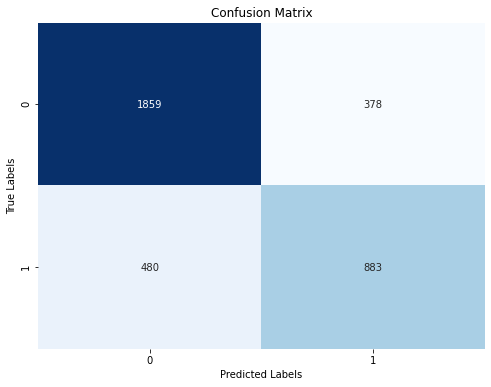


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2237
           1       0.70      0.65      0.67      1363

    accuracy                           0.76      3600
   macro avg       0.75      0.74      0.74      3600
weighted avg       0.76      0.76      0.76      3600

ROC AUC Score: 84.79 %


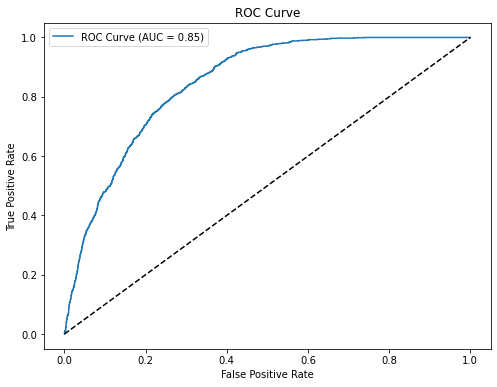

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)
y_pred_proba = best_rf_classifier.predict_proba(X_test)[:, 1]  # Predict class probabilities for ROC curve

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(accuracy*100,2),'%')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", round(roc_auc*100,2),'%')

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#  Test on a new sample questions

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features
def remove_stopwords(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Join the filtered tokens back into a sentence
    return ' '.join(filtered_tokens)

def lemmatize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Lemmatize each word and join them back into a sentence
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def query_point_creator(q1, q2):
    input_query = []

    # Preprocess, remove stopwords, and lemmatize the input questions
    q1 = lemmatize_text(remove_stopwords(preprocess(q1)))
    q2 = lemmatize_text(remove_stopwords(preprocess(q2)))

    # Fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # Fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # Fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # Fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # BOW feature for q1
    q1_bow = tfidf_vectorizer.transform([q1]).toarray()

    # BOW feature for q2
    q2_bow = tfidf_vectorizer.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1, 22), q1_bow, q2_bow))

In [ ]:
q1 = 'How are you?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What about you?'

In [ ]:
res=best_rf_classifier.predict(query_point_creator(q1,q4))
if res==1:
    print('Duplicate question pairs detected!!!')
else:
    print('Questions are different!!')

Questions are different!!


In [62]:
import pickle
pickle.dump(best_rf_classifier,open('model.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf.pkl','wb'))

In [ ]:
pickle.dump()